In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [5]:
# Load the data
df = pd.read_csv('user_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")


Dataset shape: (993, 10)

Columns: ['user_id', 'first_seen', 'last_seen', 'total_sessions', 'total_revenue', 'age', 'signup_date', 'email_domain', 'subscription_type', 'is_active']


In [6]:
# Display first few rows
print("First 5 rows:")
df.head()


First 5 rows:


,user_id,first_seen,last_seen,total_sessions,total_revenue,age,signup_date,email_domain,subscription_type,is_active
0,user_0001,2024-01-21 05:53:33,2024-12-12 19:04:21,6,495.504882,28,2024-01-21 05:53:33,outlook.com,enterprise,True
1,user_0002,2024-02-08 23:57:21,2024-11-09 16:53:43,6,301.324971,38,2024-01-22 23:57:21,hotmail.com,premium,True
2,user_0003,2024-01-02 20:32:01,2024-01-02 20:32:01,1,0.000000,23,2023-12-23 20:32:01,hotmail.com,free,False
3,user_0004,2024-02-27 21:40:41,2024-09-18 01:27:11,5,0.000000,29,2024-02-05 21:40:41,company.com,premium,True
4,user_0005,2024-03-05 10:36:47,2024-03-05 10:36:47,1,0.000000,25,2024-02-19 10:36:47,hotmail.com,enterprise,True


In [7]:
# Basic info about the dataset
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            993 non-null    object 
 1   first_seen         993 non-null    object 
 2   last_seen          993 non-null    object 
 3   total_sessions     993 non-null    int64  
 4   total_revenue      993 non-null    float64
 5   age                993 non-null    int64  
 6   signup_date        993 non-null    object 
 7   email_domain       993 non-null    object 
 8   subscription_type  993 non-null    object 
 9   is_active          993 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 70.9+ KB


In [8]:
# Check for missing values
print("Missing values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])


Missing values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [9]:
# Numerical columns summary
print("Numerical columns summary:")
numerical_cols = ['total_sessions', 'total_revenue', 'age']
df[numerical_cols].describe()


Numerical columns summary:


,total_sessions,total_revenue,age
count,993.000000,993.000000,993.000000
mean,5.035247,386.419975,41.982880
std,2.249500,354.301507,13.708247
min,1.000000,0.000000,18.000000
25%,3.000000,57.566172,30.000000
50%,5.000000,338.048086,42.000000
75%,6.000000,574.524811,54.000000
max,14.000000,1804.344156,65.000000


In [10]:
# Categorical columns summary
print("Categorical columns summary:")
categorical_cols = ['email_domain', 'subscription_type', 'is_active']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Categorical columns summary:

email_domain:
email_domain
hotmail.com    215
outlook.com    208
gmail.com      205
company.com    193
yahoo.com      172
Name: count, dtype: int64

subscription_type:
subscription_type
enterprise    334
premium       331
free          328
Name: count, dtype: int64

is_active:
is_active
False    498
True     495
Name: count, dtype: int64


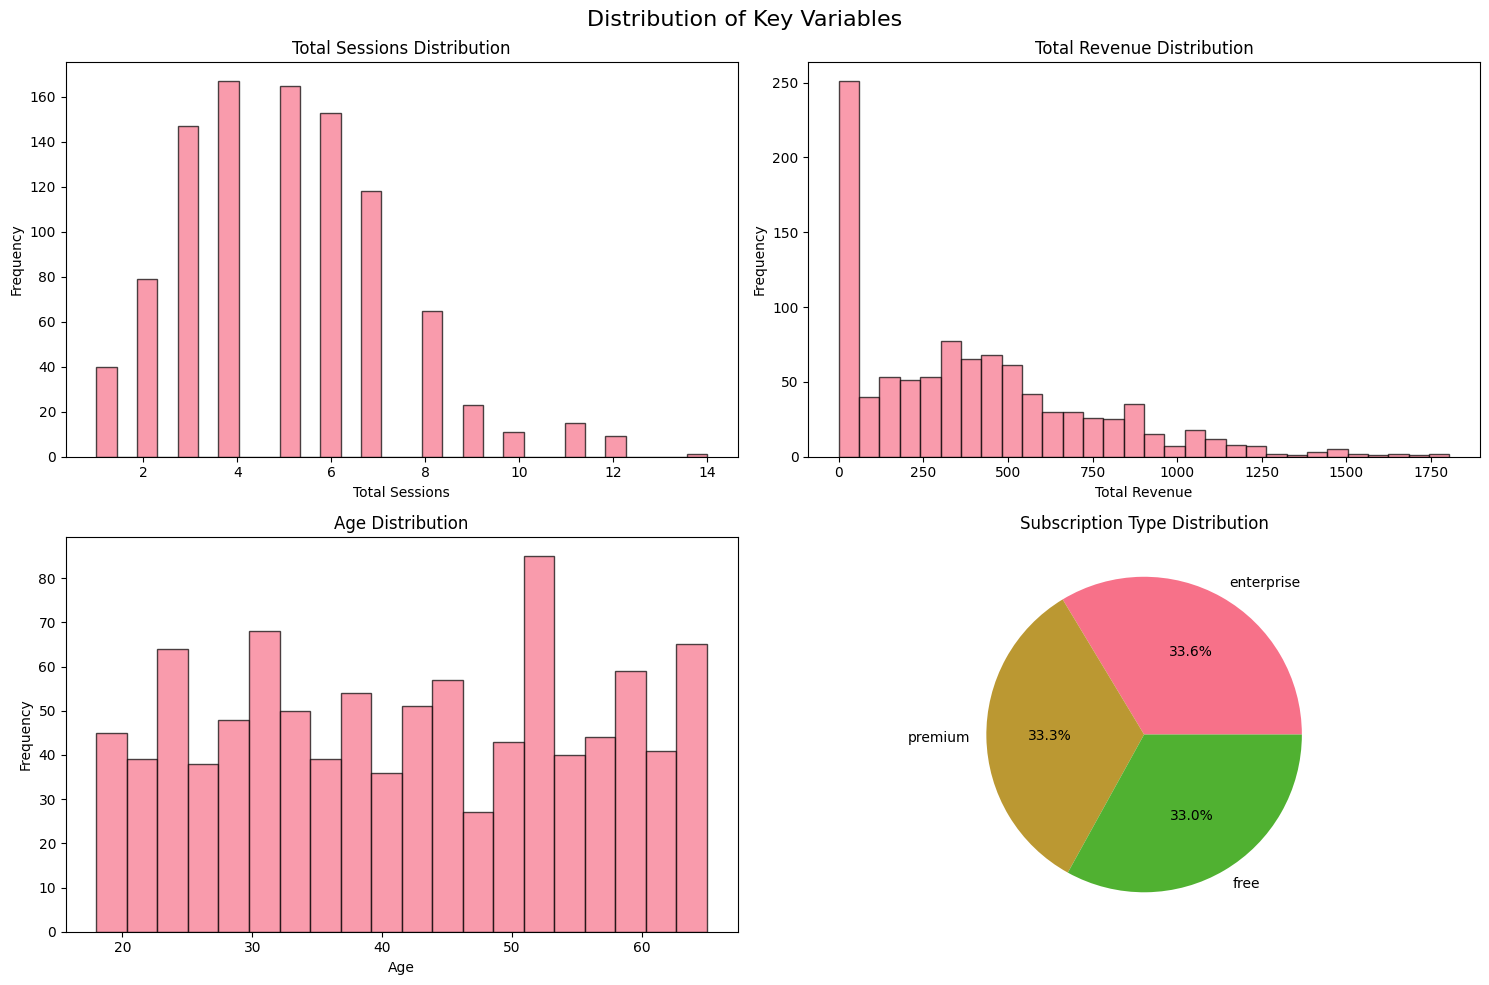

In [11]:
# Distribution plots for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16)

# Total sessions distribution
axes[0, 0].hist(df['total_sessions'], bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Total Sessions Distribution')
axes[0, 0].set_xlabel('Total Sessions')
axes[0, 0].set_ylabel('Frequency')

# Total revenue distribution
axes[0, 1].hist(df['total_revenue'], bins=30, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Total Revenue Distribution')
axes[0, 1].set_xlabel('Total Revenue')
axes[0, 1].set_ylabel('Frequency')

# Age distribution
axes[1, 0].hist(df['age'], bins=20, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')

# Subscription type distribution
subscription_counts = df['subscription_type'].value_counts()
axes[1, 1].pie(subscription_counts.values, labels=subscription_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title('Subscription Type Distribution')

plt.tight_layout()
plt.show()


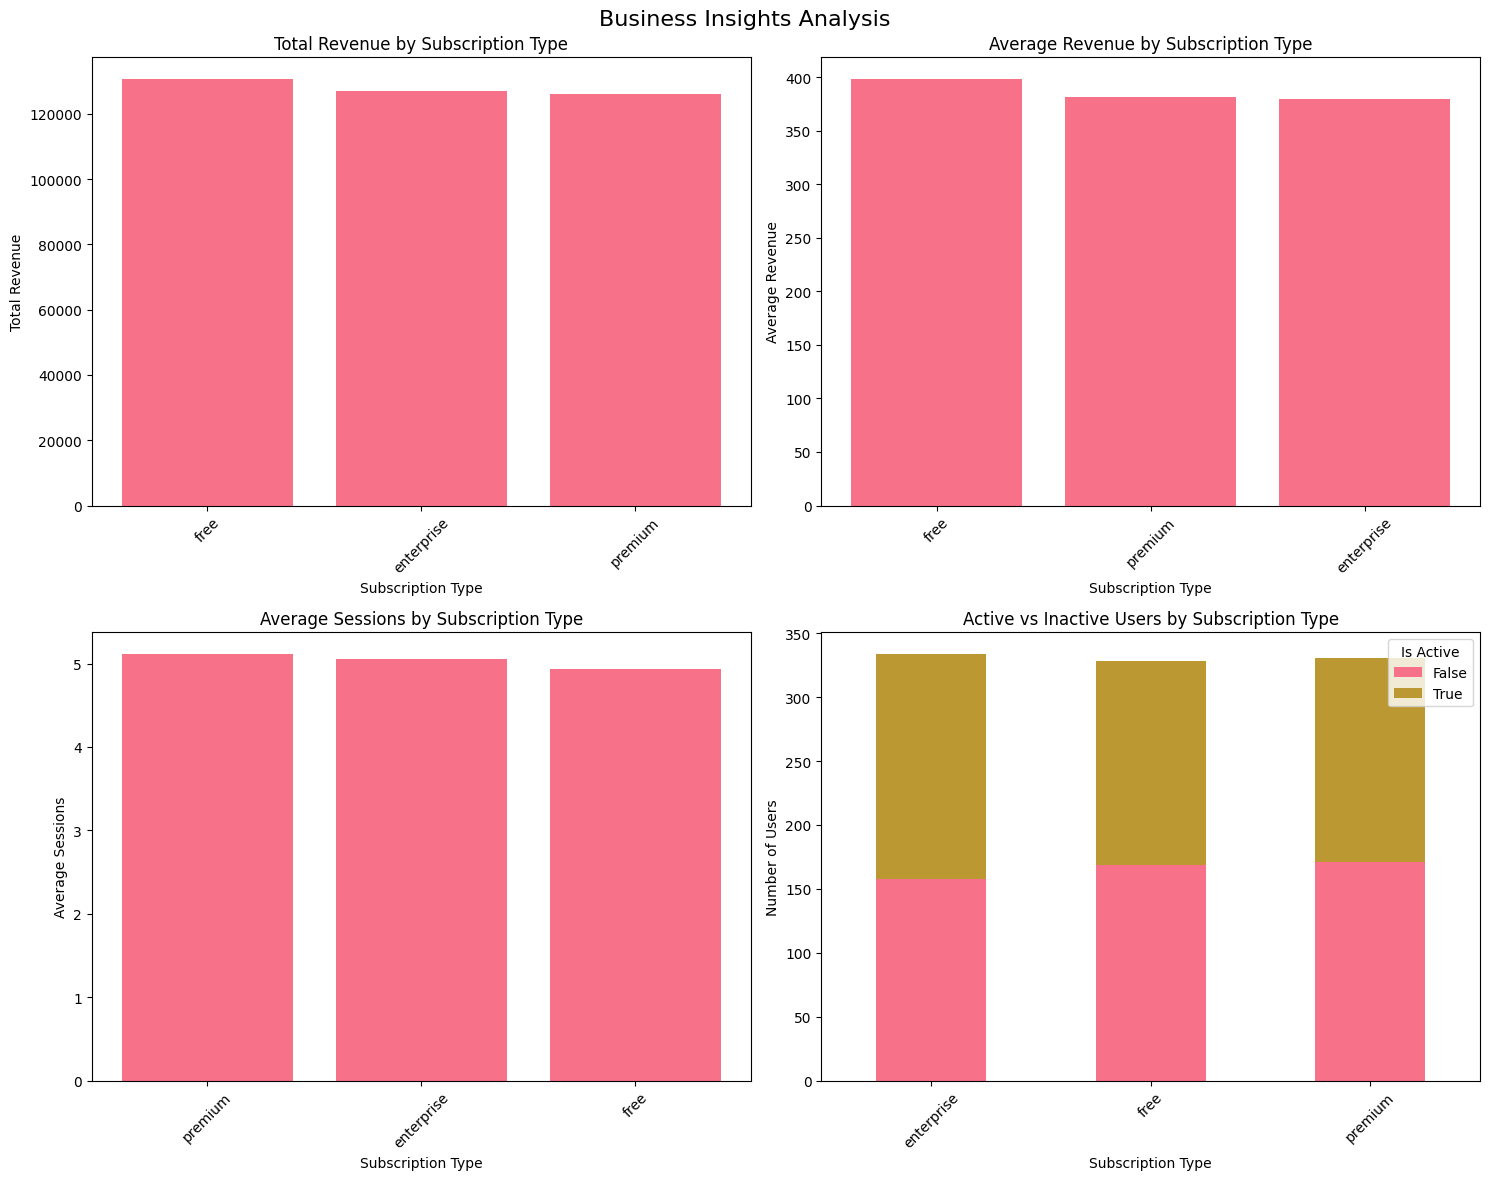


Revenue Statistics by Subscription Type:
                   count    mean  median        sum
subscription_type                                  
enterprise           334  379.72  339.55  126825.39
free                 328  398.59  353.25  130736.18
premium              331  381.13  309.03  126153.46


In [12]:
# Revenue analysis by subscription type
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Business Insights Analysis', fontsize=16)

# Total revenue by subscription type
revenue_by_subscription = df.groupby('subscription_type')['total_revenue'].sum().sort_values(ascending=False)
axes[0, 0].bar(revenue_by_subscription.index, revenue_by_subscription.values)
axes[0, 0].set_title('Total Revenue by Subscription Type')
axes[0, 0].set_xlabel('Subscription Type')
axes[0, 0].set_ylabel('Total Revenue')
axes[0, 0].tick_params(axis='x', rotation=45)

# Average revenue by subscription type
avg_revenue_by_subscription = df.groupby('subscription_type')['total_revenue'].mean().sort_values(ascending=False)
axes[0, 1].bar(avg_revenue_by_subscription.index, avg_revenue_by_subscription.values)
axes[0, 1].set_title('Average Revenue by Subscription Type')
axes[0, 1].set_xlabel('Subscription Type')
axes[0, 1].set_ylabel('Average Revenue')
axes[0, 1].tick_params(axis='x', rotation=45)

# Sessions by subscription type
sessions_by_subscription = df.groupby('subscription_type')['total_sessions'].mean().sort_values(ascending=False)
axes[1, 0].bar(sessions_by_subscription.index, sessions_by_subscription.values)
axes[1, 0].set_title('Average Sessions by Subscription Type')
axes[1, 0].set_xlabel('Subscription Type')
axes[1, 0].set_ylabel('Average Sessions')
axes[1, 0].tick_params(axis='x', rotation=45)

# Active vs Inactive users by subscription type
activity_by_subscription = df.groupby(['subscription_type', 'is_active']).size().unstack(fill_value=0)
activity_by_subscription.plot(kind='bar', ax=axes[1, 1], stacked=True)
axes[1, 1].set_title('Active vs Inactive Users by Subscription Type')
axes[1, 1].set_xlabel('Subscription Type')
axes[1, 1].set_ylabel('Number of Users')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Is Active')

plt.tight_layout()
plt.show()

print("\nRevenue Statistics by Subscription Type:")
print(df.groupby('subscription_type')['total_revenue'].agg(['count', 'mean', 'median', 'sum']).round(2))


In [13]:
# Key statistics summary
total_users = len(df)
total_revenue = df['total_revenue'].sum()
avg_revenue_per_user = df['total_revenue'].mean()
active_users = df['is_active'].sum()
active_rate = (active_users / total_users) * 100

print("=== KEY FINDINGS SUMMARY ===")
print(f"\n📊 Dataset Overview:")
print(f"   • Total Users: {total_users:,}")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Average Revenue per User: ${avg_revenue_per_user:.2f}")
print(f"   • Active Users: {active_users:,} ({active_rate:.1f}%)")

print(f"\n💰 Revenue Insights:")
revenue_by_type = df.groupby('subscription_type')['total_revenue'].agg(['count', 'mean', 'sum'])
for sub_type in revenue_by_type.index:
    count = revenue_by_type.loc[sub_type, 'count']
    avg_rev = revenue_by_type.loc[sub_type, 'mean']
    total_rev = revenue_by_type.loc[sub_type, 'sum']
    print(f"   • {sub_type.title()}: {count:,} users, Avg: ${avg_rev:.2f}, Total: ${total_rev:,.2f}")

print(f"\n👥 User Demographics:")
age_stats = df['age'].agg(['mean', 'median', 'min', 'max'])
print(f"   • Age Range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")
print(f"   • Average Age: {age_stats['mean']:.1f} years")
print(f"   • Median Age: {age_stats['median']:.1f} years")

print(f"\n📧 Email Domains:")
top_domains = df['email_domain'].value_counts().head(3)
for domain, count in top_domains.items():
    percentage = (count / total_users) * 100
    print(f"   • {domain}: {count:,} users ({percentage:.1f}%)")

print(f"\n🎯 Activity Insights:")
avg_sessions = df['total_sessions'].mean()
print(f"   • Average Sessions per User: {avg_sessions:.1f}")

# Top performing users
print(f"\n🏆 Top Performers:")
top_revenue_user = df.loc[df['total_revenue'].idxmax()]
top_sessions_user = df.loc[df['total_sessions'].idxmax()]
print(f"   • Highest Revenue: ${top_revenue_user['total_revenue']:.2f} ({top_revenue_user['subscription_type']} user)")
print(f"   • Most Sessions: {top_sessions_user['total_sessions']} sessions ({top_sessions_user['subscription_type']} user)")

print(f"\n📈 Recommendations:")
print("   • Focus on converting free users to premium/enterprise tiers")
print("   • Develop retention strategies for users with low session counts")
print("   • Investigate patterns in high-revenue users for replication")


=== KEY FINDINGS SUMMARY ===

📊 Dataset Overview:
   • Total Users: 993
   • Total Revenue: $383,715.04
   • Average Revenue per User: $386.42
   • Active Users: 495 (49.8%)

💰 Revenue Insights:
   • Enterprise: 334 users, Avg: $379.72, Total: $126,825.39
   • Free: 328 users, Avg: $398.59, Total: $130,736.18
   • Premium: 331 users, Avg: $381.13, Total: $126,153.46

👥 User Demographics:
   • Age Range: 18 - 65 years
   • Average Age: 42.0 years
   • Median Age: 42.0 years

📧 Email Domains:
   • hotmail.com: 215 users (21.7%)
   • outlook.com: 208 users (20.9%)
   • gmail.com: 205 users (20.6%)

🎯 Activity Insights:
   • Average Sessions per User: 5.0

🏆 Top Performers:
   • Highest Revenue: $1804.34 (premium user)
   • Most Sessions: 14 sessions (premium user)

📈 Recommendations:
   • Focus on converting free users to premium/enterprise tiers
   • Develop retention strategies for users with low session counts
   • Investigate patterns in high-revenue users for replication
